## Imports

In [1]:
# Python Modules
# --------------------------------------------------
import os
import cv2
import numpy             as np
import matplotlib.pyplot as plt


# Torch Modules
# --------------------------------------------------
import torch
import torch.nn            as nn
import torch.optim         as optim
import torch.nn.functional as F

from torchvision      import transforms
from torch.utils.data import (
    Dataset, 
    DataLoader
)


# Custom Modules
# --------------------------------------------------
import config
import utils

from models import Net

## Load Data

In [11]:
%%capture
if not all([
    os.path.isdir(config.TRAIN_DATA_FILEPATH),
    os.path.isdir(config.TEST_DATA_FILEPATH)
]):
    !sh load_data.sh

## Preprocess Data

In [12]:
# Transformer
# --------------------------------------------------
data_transform = transforms.Compose([
    utils.Rescale(config.RESCALE_SIZE),
    utils.RandomCrop(config.CROP_SIZE),
    utils.Normalize(),
    utils.ToTensor()
])


# Preprocessing
# --------------------------------------------------
test_data = utils.FacialKeypointsDataset(
    csv_file  = config.TEST_KEYPOINTS_PATH,
    root_dir  = config.TEST_DATA_FILEPATH,
    transform = data_transform
)

test_loader = DataLoader(
    dataset     = test_data, 
    batch_size  = config.DATA_LOADER_BATCH_SIZE,
    shuffle     = config.DATA_LOADER_SHUFFLE, 
    num_workers = config.DATA_LOADER_NUM_WORKERS
)

## Load Network

In [13]:
if os.path.isfile(f"{config.MODEL_DIR}/{config.MODEL_NAME}"): 
    net = Net()
    
    net.load_state_dict(torch.load(f"{config.MODEL_DIR}/{config.MODEL_NAME}"))
    net.eval()
    
    print(net)
    
else:
    print(f"[ERROR] network not found: {config.MODEL_DIR}/{config.MODEL_NAME}")

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.1)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.2)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout(p=0.3)
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout(p=0.4)
  (conv5): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop5): Dropout(p=0.5)
  (fc1): Linear(in_features=9216, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True

## Predict

In [14]:
test_images, pred_keypoints, true_keypoints = utils.net_sample_output(
    test_loader = test_loader, 
    net         = net
)

## Evaluate Predictions

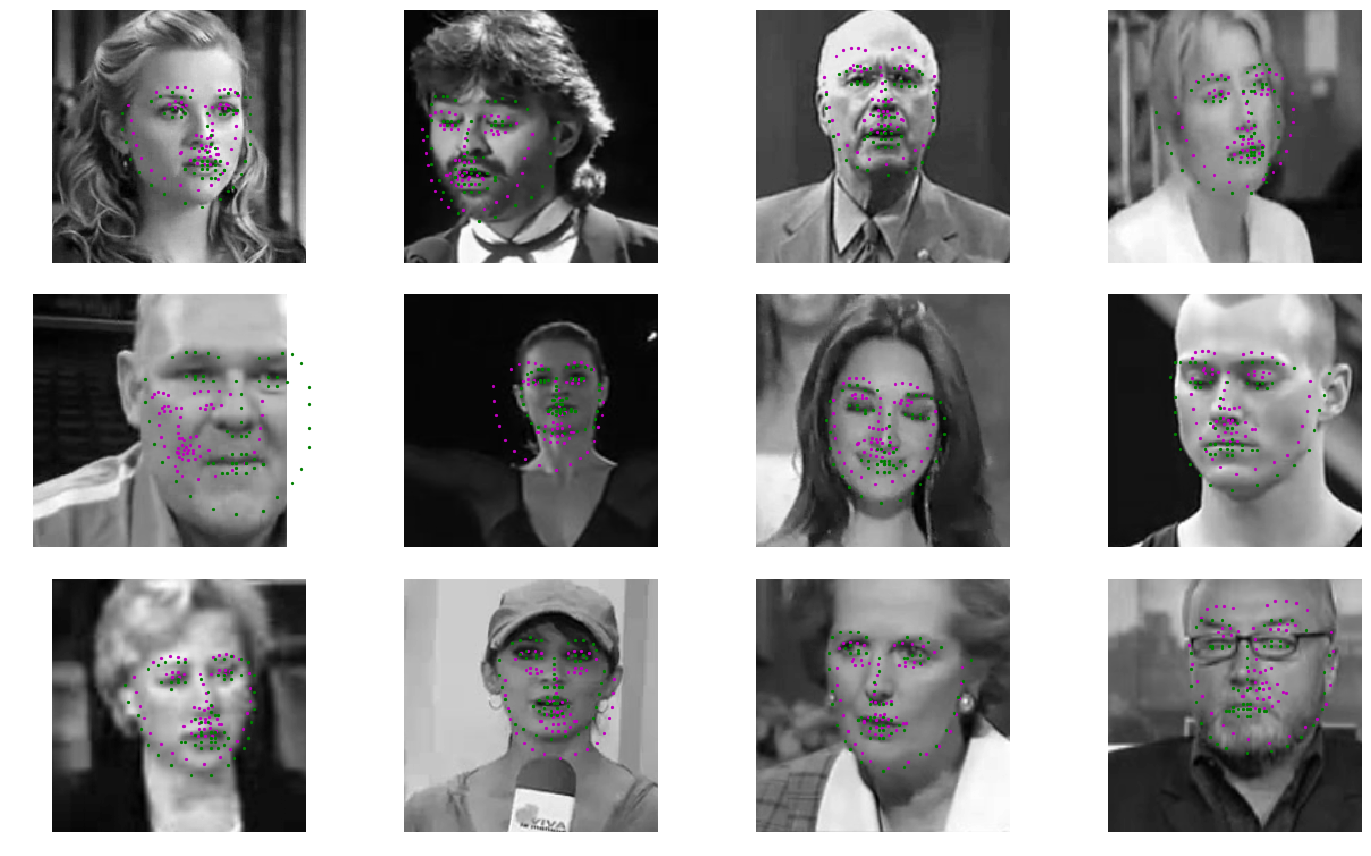

In [15]:
utils.plot_model_error(
    test_images    = test_images, 
    pred_keypoints = pred_keypoints, 
    true_keypoints = true_keypoints,
    num_images     = 12
) 

## Feature Map Visualization

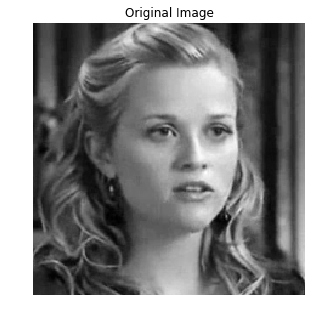

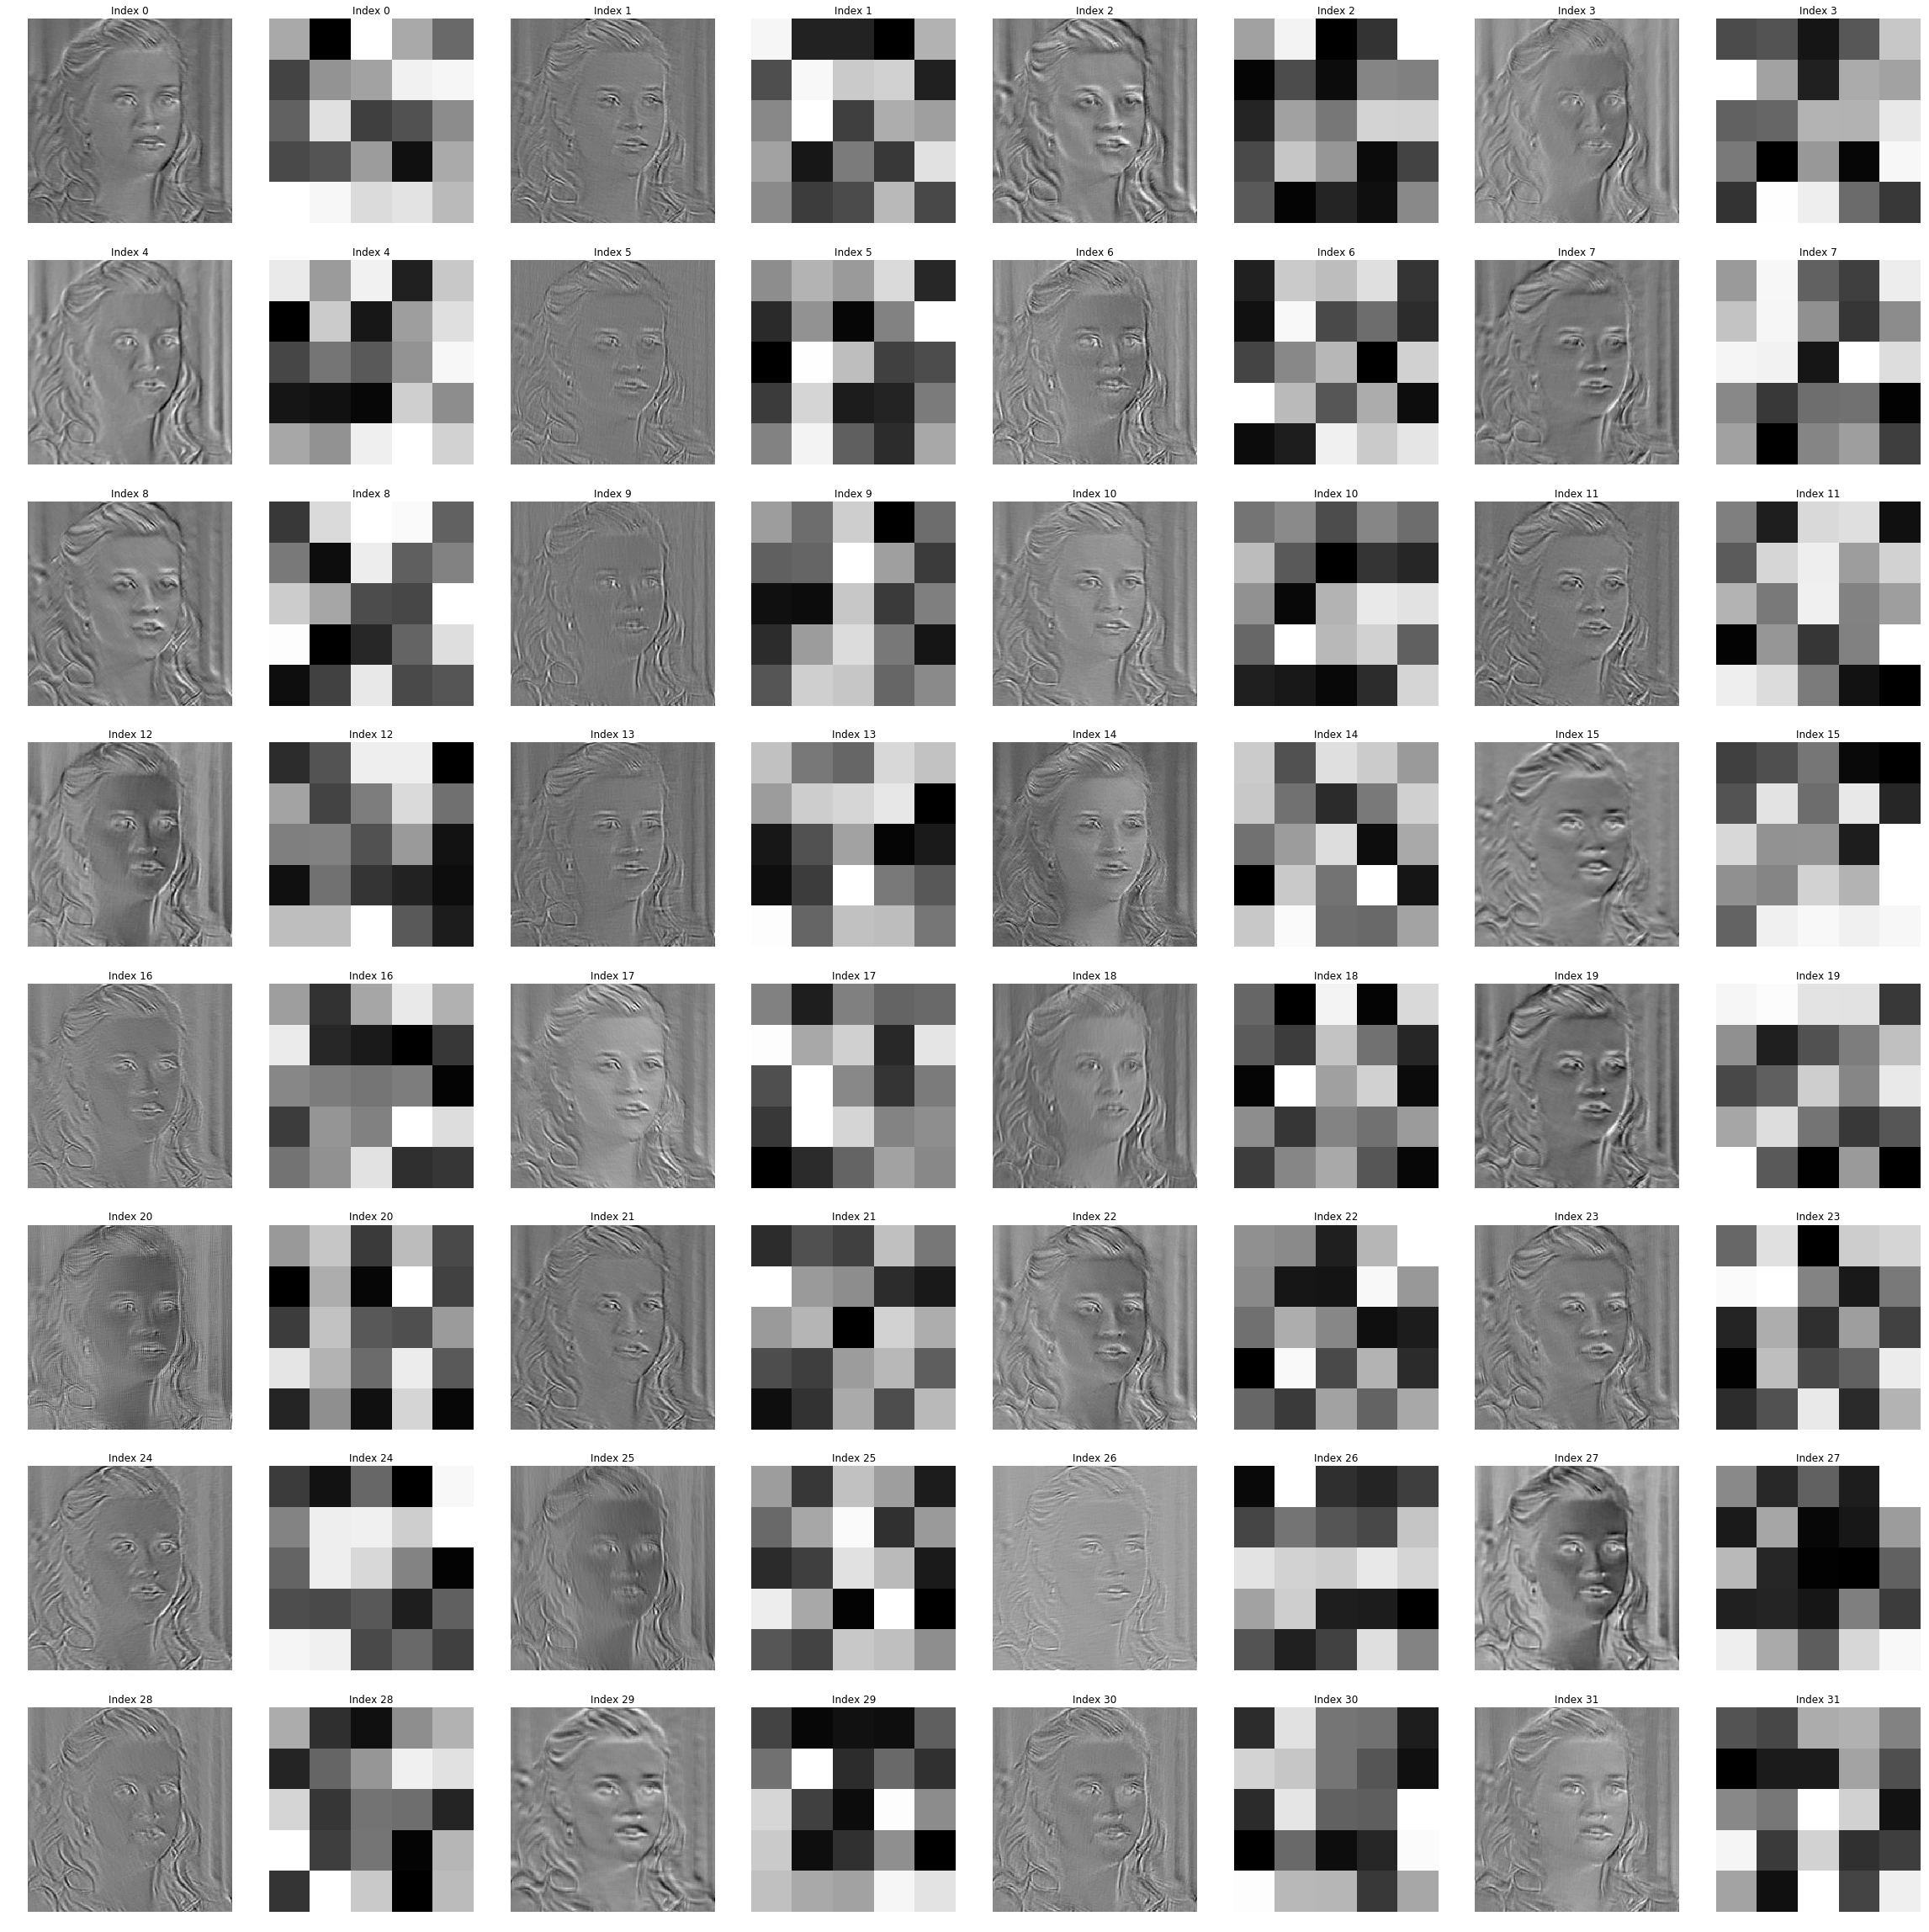

In [20]:
utils.plot_feature_maps(
    image   = test_images[0],
    weights = net.conv1.weight
)